In [1]:
import tensorflow as tf
import keras.applications.vgg16 as vgg16
import cv2
import numpy as np
import innvestigate
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load the image
image_path = "cat_image.jpg"
original_image = cv2.imread(image_path)
# Resize the image to (224, 224, 3)
resized_image = cv2.resize(original_image, (224, 224))
image = resized_image

# Get model
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input

# Add batch axis and preprocess
x = preprocess(image[None])
# Predict
predictions = model.predict(x)


1/1 [==============================] - 2s 2s/step


In [2]:
decoded_predictions = decode_predictions(predictions, top=3)[0]

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1: Egyptian_cat (0.30)
2: tabby (0.23)
3: lynx (0.19)


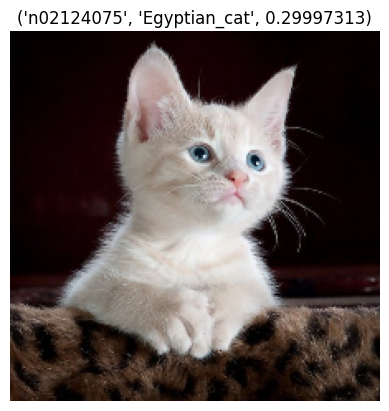

In [5]:
# Convert BGR to RGB (OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot using Matplotlib
plt.imshow(img_rgb)
plt.title(str(decoded_predictions[0]))
plt.axis('off')  # Turn off axis labels
plt.show()